# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)


<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.


<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>


**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [3]:
# read the data & Exploring the first 5 rows:
df = pd.read_csv('ab_data.csv')
df.head()


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [4]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [5]:
df.shape

(294478, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [7]:
sum(df.duplicated())

0

**b.** Use the cell below to find the number of rows in the dataset.

In [8]:
df.shape[0]

294478

**c.** The number of unique users in the dataset.

In [9]:
# getting number of unique user_id :
df['user_id'].nunique()

290584

**d.** The proportion of users converted.

In [10]:
df.converted.mean()

0.11965919355605512

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [11]:
df.query(" group == 'treatment' and landing_page == 'old_page' ")['user_id'].count()

1965

In [12]:
df.query(" group == 'control' and landing_page == 'new_page' ")['user_id'].count()

1928

**f.** Do any of the rows have missing values?

In [13]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

No missing values

In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [14]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
t1 = df.query(" group == 'treatment' and landing_page == 'new_page' ")  
t2 = df.query(" group == 'control' and landing_page == 'old_page' ")

df2 = pd.concat([t1 , t2])

In [15]:
df2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [16]:
df2.shape

(290585, 5)

In [17]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [18]:
df2['user_id'].nunique()


290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [19]:
df2[df2.duplicated(['user_id'])]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**c.** Display the rows for the duplicate **user_id**? 

In [20]:
df2[df2.duplicated(['user_id'] ,  keep = False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [21]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 
df2.drop_duplicates(['user_id'] , inplace = True )
# Check again if the row with a duplicate user_id is deleted or not
df2[df2.duplicated(['user_id'])]

,user_id,timestamp,group,landing_page,converted


4-
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>

 


In [22]:
p = df2['converted'].mean()
p

0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [23]:
𝑝_𝑜𝑙𝑑  = df2.query(" group == 'control'")['converted'].mean()
𝑝_𝑜𝑙𝑑 

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [24]:
𝑝_new  = df2.query(" group == 'treatment'")['converted'].mean()
𝑝_new

0.11880806551510564

In [25]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff_p =  𝑝_new - 𝑝_𝑜𝑙𝑑 
obs_diff_p

-0.0015782389853555567

In [26]:
df2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


**d.** What is the probability that an individual received the new page?

In [27]:
df2.query(" group == 'treatment'")['converted'].count() / df2.converted.count()

0.50006194422266881

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

Although there is a difference between the conversion rate, it is a very, very small difference, so this doesn't make sense yet (it doesn't show optimization in the new page)

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  

For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

                                        𝐻0 :  𝑝𝑜𝑙𝑑  >= 𝑝𝑛𝑒𝑤
                                        𝐻1 :  𝑝𝑜𝑙𝑑  <  𝑝𝑛𝑒𝑤 

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

In [28]:
𝑝_new

0.11880806551510564

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [29]:
𝑝_𝑜𝑙𝑑 

0.1203863045004612

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>
*Hint*: The treatment group users are shown the new page.

In [30]:
n_new = df2.query("landing_page == 'new_page'")['group'].count()
n_new 

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [31]:
n_old  = df2.query("landing_page == 'old_page'")['group'].count()
n_old 

145274

In [32]:
df2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1



**h. Sampling distribution** <br>
 

In [33]:
# Sampling distribution 
p_diffs = []
size = df2.shape[0]

for _ in range(10000):
    b_samp = df2.sample(size, replace=True)
    
    new_page_converted = b_samp.query("landing_page == 'new_page'")['converted'].mean()
    old_page_converted = b_samp.query("landing_page == 'old_page'")['converted'].mean()
    diffs = (new_page_converted - old_page_converted) 
    p_diffs.append(diffs)





In [34]:
p_diffs = np.array(p_diffs)

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  

 

In [35]:
lower , upper =  np.percentile(p_diffs , 2.5) , np.percentile(p_diffs , 97.5) 
lower , upper

(-0.0039493009922984884, 0.00079257868624646943)

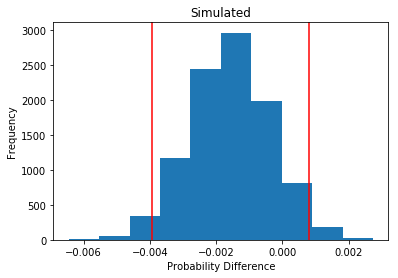

In [36]:
plt.hist(p_diffs)
plt.axvline(lower, c='red')
plt.axvline(upper, c='red')
plt.title("Simulated")
plt.xlabel("Probability Difference")
plt.ylabel('Frequency');

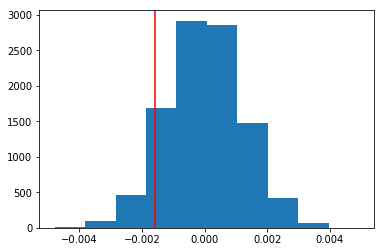

In [37]:
null_vals = np.random.normal(0, np.std(p_diffs), 10000)
plt.hist(null_vals) 
plt.axvline(obs_diff_p, c='red');

In [38]:
(null_vals > obs_diff_p).mean()   #  p_value

0.90720000000000001

## fail to reject h0 because p_value > alpha = .05



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [39]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = df2.query(" landing_page == 'old_page' ").converted.sum()
 
# number of conversions with the new_page
convert_new = df2.query(" landing_page == 'new_page' ").converted.sum()
 
# number of individuals who were shown the old_page
n_old = df2.query(" landing_page == 'old_page' ").landing_page.count()

# number of individuals who received new_page
n_new = df2.query(" landing_page == 'new_page' ").landing_page.count()
 

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [40]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest( [convert_old , convert_new] , [n_old , n_new] ,alternative = 'smaller')
print(z_score, p_value)

1.31092419842 0.905058312759


# p_value > alpha , fail to reject h0

<a id='regression'></a>
### Part III - A regression approach
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

logisic regression (used to predict only two possible outcomes )

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. 

In [41]:
new = pd.get_dummies(df2['landing_page'])

df_new = df2.join(new)
df_new.head()

,user_id,timestamp,group,landing_page,converted,new_page,old_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,0
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,0


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [42]:
df_new['intercept'] = 1
model = sm.Logit(df_new['converted'], df_new[['intercept','new_page']])
results = model.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-12-05 16:58 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
new_page     -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

p-value is the probability of getting oir statistic or a more extreme value if the null is true. 
but In our case, it represents the probability that the correlation between x and y in the sample data.


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

it can be useful to add other factors to the model 

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 
  

 Provide the statistical output as well as a written response to answer this question.

In [43]:
# Read the countries.csv
df3 = pd.read_csv('countries.csv')
df_merged = df3.set_index('user_id').join(df2.set_index('user_id'))
df_merged.head()

,country,timestamp,group,landing_page,converted
user_id,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0


In [57]:
df3.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [84]:
new2 = pd.get_dummies(df_merged['country'])

df_merged = df_merged.join(new2)
df_merged.head()

,country,timestamp,group,landing_page,converted,CA,UK,US
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,0,1,0


In [85]:
# Fit your model, and summarize the results
df_merged['intercept'] = 1
model = sm.Logit(df_merged['converted'], df_merged[['intercept','CA' , 'UK']])
results = model.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-12-05 18:12 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9967    0.0068  -292.3145  0.0000  -2.0101  -1.9833
CA           -0.0408    0.0269    -1.5178  0.1291  -0.0935   0.0119
UK            0.0099    0.0133     0.7458  0.4558  -0.0161   0.0360
==================================================================

"""

p-values for US , UK > 0.05, so we cannot reject the null hypothesis

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion. Create the necessary additional columns, and fit the new model.

Provide the summary results, and your conclusions based on the results.

In [89]:
df_interaction = pd.merge(df_merged , df_new , on = ['user_id' , 'timestamp','group' ,'landing_page' , 'converted' ,'intercept'] )
df_interaction.head()

,user_id,country,timestamp,group,landing_page,converted,CA,UK,US,intercept,new_page,old_page
0,834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0,1
1,928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,0,1,1,1,0
2,822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,0,1,1,0
3,711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0,1
4,710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,0,1,0,1,1,0


In [92]:
df_interaction['CA_NEW'] = df_interaction['CA'] * df_interaction['new_page']
df_interaction['UK_NEW'] = df_interaction['UK'] * df_interaction['new_page']
df_interaction.head()

,user_id,country,timestamp,group,landing_page,converted,CA,UK,US,intercept,new_page,old_page,CA_NEW,UK_NEW
0,834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0,1,0,0
1,928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,0,1,1,1,0,1,0
2,822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,0,1,1,0,0,1
3,711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0,1,0,0
4,710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,0,1,0,1,1,0,0,1


In [96]:
df_interaction['intercept'] = 1
model = sm.Logit(df_interaction['converted'], df_interaction[['intercept','CA_NEW' , 'UK_NEW' , 'CA' , 'UK'  , 'new_page']])
results = model.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-12-05 18:25 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9865    0.0096  -206.3440  0.0000  -2.0053  -1.9676
CA_NEW        0.0469    0.0538     0.8718  0.3833  -0.0585   0.1523
UK_NEW        0.0783    0.0568     1.3783  0.1681  -0.0330   0.1896
CA           -0.0175    0.0377    -0.4652  0.6418  -0.0914   0.0563
UK           -0.0057    0.0188    -0.3057  0.7598  -0.0426   0.0311
new_page     -0.0674    0.0520    -1.2967  0.1947  -0.1694   0.0345
==================================================================

"""

The p-values > 0.05 , so again we fail to reject the null hypothesis. 

In [47]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0